#### Is the DJIA showing signals that we are in a state of the economy that is fragile and nearing a crash?

We can try to detect trends with decomposition and principle component anaylsis etc. 

In [2]:
#import the modules
import numpy as np
import quandl
import pandas as pd
from scipy.optimize import curve_fit
import pandas_datareader.data as web
from sklearn.decomposition import KernelPCA

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns


In [3]:
symbols = ['AXP', 'AAPL', 'BA', 'CAT', 'CSCO', 'CVX', 'DD', 'XOM',
'GE', 'GS', 'IBM', 'INTC', 'JNJ', 'KO', 'JPM', 'MCD', 'MMM',
'MRK', 'MSFT', 'NKE', 'PFE', 'PG', 'TRV', 'UNH', 'UTX', 'VZ',
'V', 'WMT', 'DIS', "^DJI"]

#download the data from yahoo finance
data = pd.DataFrame()
for sym in symbols:
    data[sym] = web.DataReader(sym, data_source='yahoo')['Close']

In [19]:
#remove the missing the data from the dataframe
data = data.dropna()

#seperate the DJIA index data from the above dataframe
# dji = pd.DataFrame(data.pop('^DJI'))

#show the top rows of the data in the dataframe
data[data.columns[:30]].tail()

,AXP,AAPL,BA,CAT,CSCO,CVX,DD,XOM,GE,GS,...,NKE,PFE,PG,TRV,UNH,UTX,VZ,V,WMT,DIS
Date,,,,,,,,,,,,,,,,,,,,,
2017-09-25,88.209999,150.550003,254.320007,124.320000,33.720001,117.989998,42.049999,80.980003,25.110001,230.259995,...,53.230000,35.509998,92.720001,122.669998,191.750000,114.290001,49.900002,103.019997,79.150002,99.570000
2017-09-26,88.690002,153.139999,253.699997,124.510002,33.759998,117.519997,41.549999,80.889999,24.930000,229.940002,...,53.700001,35.299999,92.650002,122.570000,192.699997,114.720001,49.509998,102.940002,79.389999,98.629997
2017-09-27,89.489998,154.229996,255.279999,124.519997,33.480000,117.449997,40.799999,81.430000,24.370001,234.759995,...,52.669998,35.450001,90.870003,122.589996,194.490005,117.180000,49.509998,103.889999,79.290001,99.239998
2017-09-28,90.139999,153.279999,254.270004,125.230003,33.349998,117.620003,40.000000,82.190002,24.240000,235.470001,...,52.630001,35.599998,90.889999,122.800003,196.100006,115.839996,49.410000,104.580002,78.949997,98.050003
2017-09-29,90.199997,153.729996,253.289993,124.690002,33.590000,117.264999,40.000000,81.739998,24.184999,236.919998,...,51.805000,35.540001,90.800003,122.190002,194.940002,115.790001,49.462700,104.889999,78.445000,98.250000


The Dow Jones index today from the past 10 years

In [5]:
df = quandl.get("BCB/UDJIAD1", authtoken="WEEjnaDYwisrEoVowaZ5")

               Value
Date                
2016-04-11  17556.41
2016-04-12  17721.25
2016-04-13  17908.28
2016-04-14  17926.43
2016-04-15  17897.46


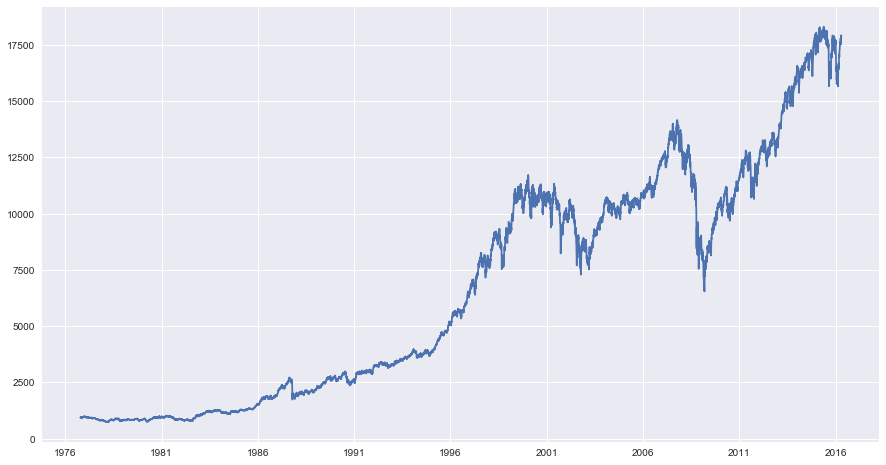

In [6]:
fig = plt.figure(figsize=(15,8))
print(df.tail())
plt.plot(df.tail(10000))

This is the historical dow jones average. We can easily see the exponential trend with some dips and what look to be cyclical trends. 

Let's see what we can learn with decomposition. First lets transform our time series out of its exponential nature.

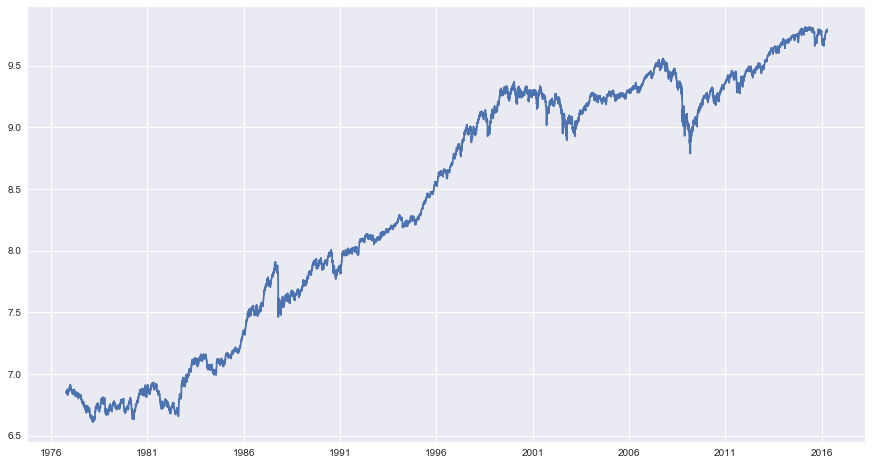

In [7]:
df['values_log'] = np.log(df.Value)
fig = plt.figure(figsize=(15,8))
plt.plot(df.values_log.tail(10000))

Shows a more linear growth, helping us to agree with our original hypothesis that we are looking at a seemingly exponential growth in our DJIA. What will this mean with the increase of wealth the increase in the value of companies and the value of currencies? 

/Users/amatheson/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


estimated seasonal or cyclical component of dj in index points: 1003.70645749


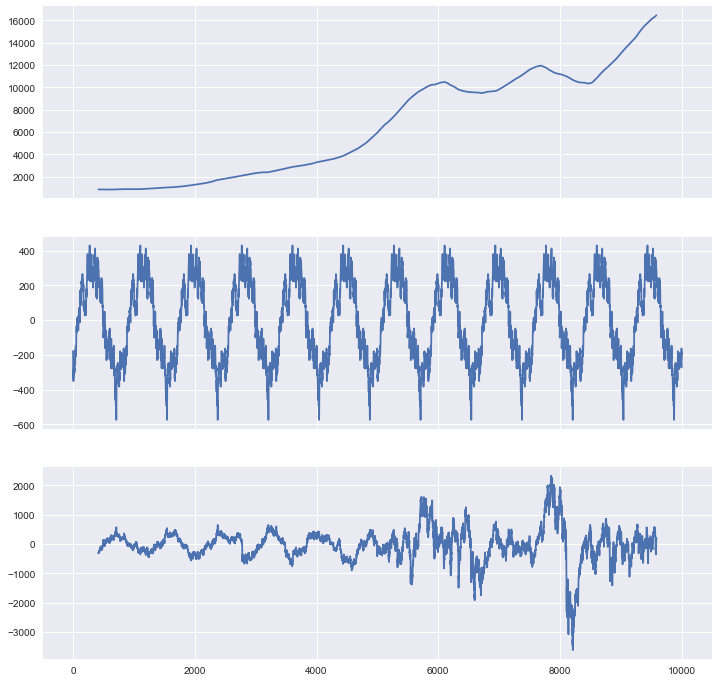

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df.Value.tail(10000).values, model='additive', freq=(10000)/12)  
fig, ax = plt.subplots(3,sharex=True, figsize=(12, 12))

ax[0].plot(decomposition.trend)
ax[1].plot(decomposition.seasonal)
ax[2].plot(decomposition.resid)

print("estimated seasonal or cyclical component of dj in index points: {}".format(decomposition.seasonal.max() - decomposition.seasonal.min()))

We are now looking at the data from the past 10000 days of data to understand the cyclical component. It looks as though we have a bi yearly cyclical trend of approximately 1000 index points.

In our residual data (the data that cannot be modelled with seasonal or trend components) we can see some interesting patterns as well as disruptions. The frequency of these disruptions (volatility) has increased in the last 5000 days or ~14 years. This could be impacted by many things. Technology in trading? news and financial reporting? the number of investors? 

TO BE CONTINUED

In [17]:
from fbprophet import Prophet
df1 = df.copy()
df1['ds'] = df1.index
df1.drop('values_log',1,inplace=True)
df1.columns = ['y','ds']
df1 = df1[['ds','y']]
print(df1.tail())

                   ds         y
Date                           
2016-04-11 2016-04-11  17556.41
2016-04-12 2016-04-12  17721.25
2016-04-13 2016-04-13  17908.28
2016-04-14 2016-04-14  17926.43
2016-04-15 2016-04-15  17897.46


In [13]:
m = Prophet(yearly_seasonality=True)
m.fit(df1)

In [14]:
future1 = m.make_future_dataframe(periods=1000, freq='D')

In [24]:
forecast = m.predict(future1)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,1896-07-14 00:00:00,51.036738,-873.024963,1002.051559
1,1896-07-15 00:00:00,51.353229,-877.939314,1033.057379
2,1896-07-16 00:00:00,52.944145,-909.630141,992.287174
3,1896-07-17 00:00:00,52.718917,-836.797070,996.449076
4,1896-07-18 00:00:00,51.556306,-939.965037,939.889911


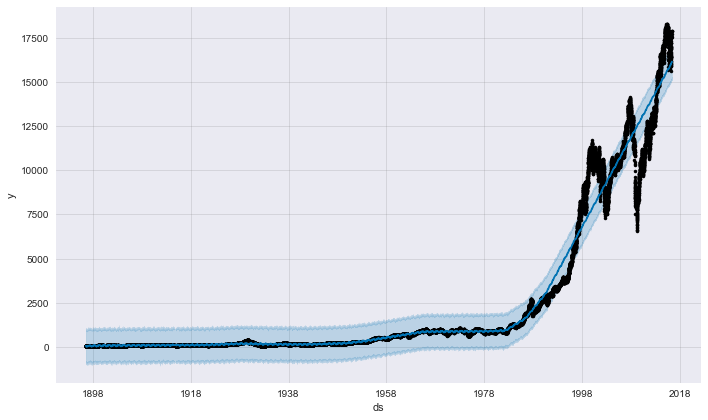

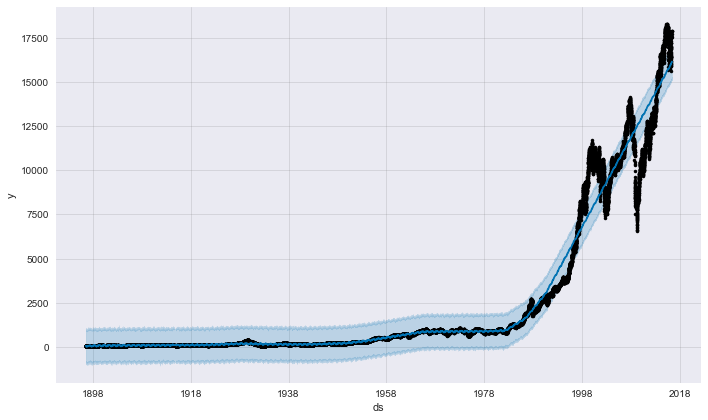

In [23]:
m.plot(forecast)